In [16]:
import _pickle as cPickle
import random


In [14]:
import _pickle as cPickle
import random

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import glob
import io
results_dir = "/aimlx/Results/EvDet/world_cup_18/"

triggers = []
langs = set()
for dir_ in glob.glob(results_dir+"*"):
    subdir = dir_.split("/")[-1]
    if subdir != "archives":
        for file_ in glob.glob(results_dir+subdir+"/*"):
            if "emb_multi" in file_ and "trigger_bursty-seg" in file_:
                with open(file_) as file:
                    for line in file:
                        if len(line.split(":")[0].split("_")) == 2:
                            langs.add(line.split(":")[0].split("_")[0])
                            triggers.append(line.split(":")[0].split("_")[0]+":"+line.split(":")[0].split("_")[1])
                            


In [24]:
model_dir = "/Users/meryemmhamdi/Documents/Rig4/meryemRig4/home/meryem/meryem/Embeddings/MultilingualEmbeddings/"
model_file = "multiCCA_512_normalized"
covered_words = [] 
with io.open(model_dir+model_file, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
    next(f)
    for i, line in enumerate(tqdm(f)):
            word, vect = line.rstrip().split(' ', 1)
            if word in triggers:
                covered_words.append(word)


0it [00:00, ?it/s]
51it [00:00, 496.10it/s]
111it [00:00, 542.03it/s]
172it [00:00, 561.96it/s]
273it [00:00, 671.91it/s]
361it [00:00, 711.68it/s]
467it [00:00, 768.84it/s]
581it [00:00, 820.95it/s]
683it [00:00, 845.51it/s]
780it [00:00, 857.68it/s]
891it [00:01, 882.65it/s]
1001it [00:01, 902.45it/s]
1108it [00:01, 915.93it/s]
1212it [00:01, 925.21it/s]
1316it [00:01, 926.57it/s]
1417it [00:01, 930.26it/s]
1517it [00:01, 930.97it/s]
1616it [00:01, 926.07it/s]
1711it [00:01, 923.12it/s]
1804it [00:01, 920.85it/s]
1905it [00:02, 925.15it/s]
2000it [00:02, 925.31it/s]
2094it [00:02, 921.05it/s]
2195it [00:02, 924.19it/s]
2289it [00:02, 922.91it/s]
2382it [00:02, 920.38it/s]
2474it [00:02, 920.21it/s]
2565it [00:02, 919.42it/s]
2656it [00:02, 918.88it/s]
2747it [00:02, 917.03it/s]
2837it [00:03, 915.99it/s]
7813821it [4:55:40, 440.46it/s]


In [25]:
count = 0
count_t = 0
for trigger in tqdm(triggers):
    if trigger in covered_words:
        count += 1
    count_t += 1

100%|██████████| 126980/126980 [00:45<00:00, 2779.51it/s]


In [26]:
count/count_t

0.6366908174515672

In [3]:

triggers = []

"""  Read the event clusters """
with open(results_dir+"emb_multi_fr_en_es_mono-trigger_bursty-seg_2018-06-18_15hour.txt") as file:
    for line in file:
        triggers.append(line.split(":")[0])

In [5]:
model = {}
lang_set = ["fr", "en", "es", ]
model_dir = "/Users/meryemmhamdi/Desktop/Rig4/home/meryem/meryem/Embeddings/MultilingualEmbeddings/"
model_file = "multiCCA_512_normalized"
with open(model_dir + model_file) as file_model:
    for i, line in tqdm(enumerate(file_model)):
        lang = line.split(" ")[0].split(":")[0]
        if lang in lang_set: 
            word = lang + "_" + line.split(" ")[0].split(":")[1]
            if word in triggers:
                vectors = [float(vector) for vector in line.split(" ")[1:]]
                model.update({word: vectors})

7813822it [14:34, 8933.05it/s]


In [32]:
print(list(model.keys()))

["en_'s", 'en_european', 'en_new', 'en_people', 'en_like', 'en_time', 'en_year', 'en_report', 'en_need', 'en_work', 'en_way', 'en_world', 'en_important', 'en_support', 'en_think', 'en_country', 'en_good', 'en_group', 'en_right', 'en_national', 'en_political', 'en_want', 'en_know', 'en_use', 'en_today', 'en_house', 'en_day', 'en_point', 'en_end', 'en_city', 'en_believe', 'en_second', 'en_place', 'en_system', 'en_million', 'en_international', 'en_human', 'en_number', 'en_fact', 'en_home', 'en_game', 'en_help', 'en_case', 'en_order', 'en_school', 'en_great', 'en_issue', 'en_future', 'en_high', 'en_united', 'en_set', 'en_able', 'en_long', 'en_team', 'en_question', 'en_life', 'en_week', 'en_better', 'en_vote', 'en_clear', 'en_course', 'en_level', 'en_money', 'en_far', 'en_family', 'en_action', 'en_season', 'en_hope', 'en_later', 'en_problem', 'en_change', 'en_play', 'en_power', 'en_party', 'en_find', 'en_view', 'en_little', 'en_let', 'en_business', 'en_south', 'en_small', 'en_major', 'en_fr

In [33]:
list(model.values())

dict_values([[-0.0144, 0.0019, 0.0722, -0.036, -0.0259, -0.0717, -0.0506, -0.034, -0.0395, -0.0951, -0.0218, 0.0121, 0.0728, -0.0282, 0.0793, 0.0705, 0.0226, 0.0255, 0.045, -0.043, -0.09, 0.0621, -0.0418, 0.043, -0.026, -0.0217, 0.0169, -0.0592, -0.0049, 0.0039, 0.0024, -0.0457, -0.0459, -0.0111, -0.0204, 0.0816, 0.0255, -0.0592, 0.033, -0.0385, 0.0066, 0.0154, 0.0188, 0.0274, 0.0178, 0.0754, -0.0431, -0.0002, 0.0112, 0.057, -0.0994, 0.0759, -0.0278, 0.0138, 0.0146, 0.0059, 0.029, -0.0001, 0.0667, -0.092, -0.0336, -0.0034, -0.0438, -0.0371, -0.0166, -0.0382, 0.0124, 0.0234, 0.029, -0.0318, 0.0162, 0.0406, -0.0355, -0.0534, 0.0031, 0.0796, 0.0316, 0.016, -0.0191, -0.0898, 0.0194, -0.0199, -0.0064, 0.0518, 0.041, -0.0227, -0.0185, -0.0573, 0.0231, -0.0041, 0.0152, -0.062, -0.0046, -0.0231, -0.0239, 0.0013, 0.038, -0.0023, -0.0011, -0.0244, 0.0039, 0.0264, 0.0016, -0.0304, -0.015, 0.0401, -0.012, -0.0361, -0.1271, 0.0285, -0.0115, -0.0611, 0.0458, -0.0002, -0.0323, -0.0216, 0.0118, -0.000

In [4]:
vectors_sample_keep = [[1,1,1], [1,1,1], [2,2,2]]

In [34]:
tsne = TSNE(n_components=2, random_state=0, n_iter=500, perplexity=40)
arr = np.array(list(model.values()))
Y = tsne.fit_transform(arr)
x = list(Y[:, 0].astype(np.float))
y = list(Y[:, 1].astype(np.float))

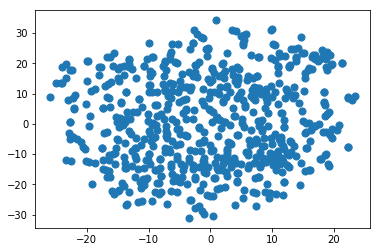

In [35]:
plt.scatter(x, y, s=50)
#patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
#plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()